<a href="https://colab.research.google.com/github/MhammadRezaValiYari/GoldTransectionAnalysisLinearRegression/blob/main/GoldTransectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essesional library

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn import linear_model
import sklearn.model_selection
import pickle

read data from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/FINAL_USO.csv'
data = pd.read_csv('/content/drive/MyDrive/FINAL_USO.csv')
df = pd.DataFrame(data)
df.head()

Mounted at /content/drive
/content/drive/MyDrive/FINAL_USO.csv


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [5]:
data = df.drop(columns=['Date'])

finding out correlation number

In [6]:
corr_score = data.corr()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

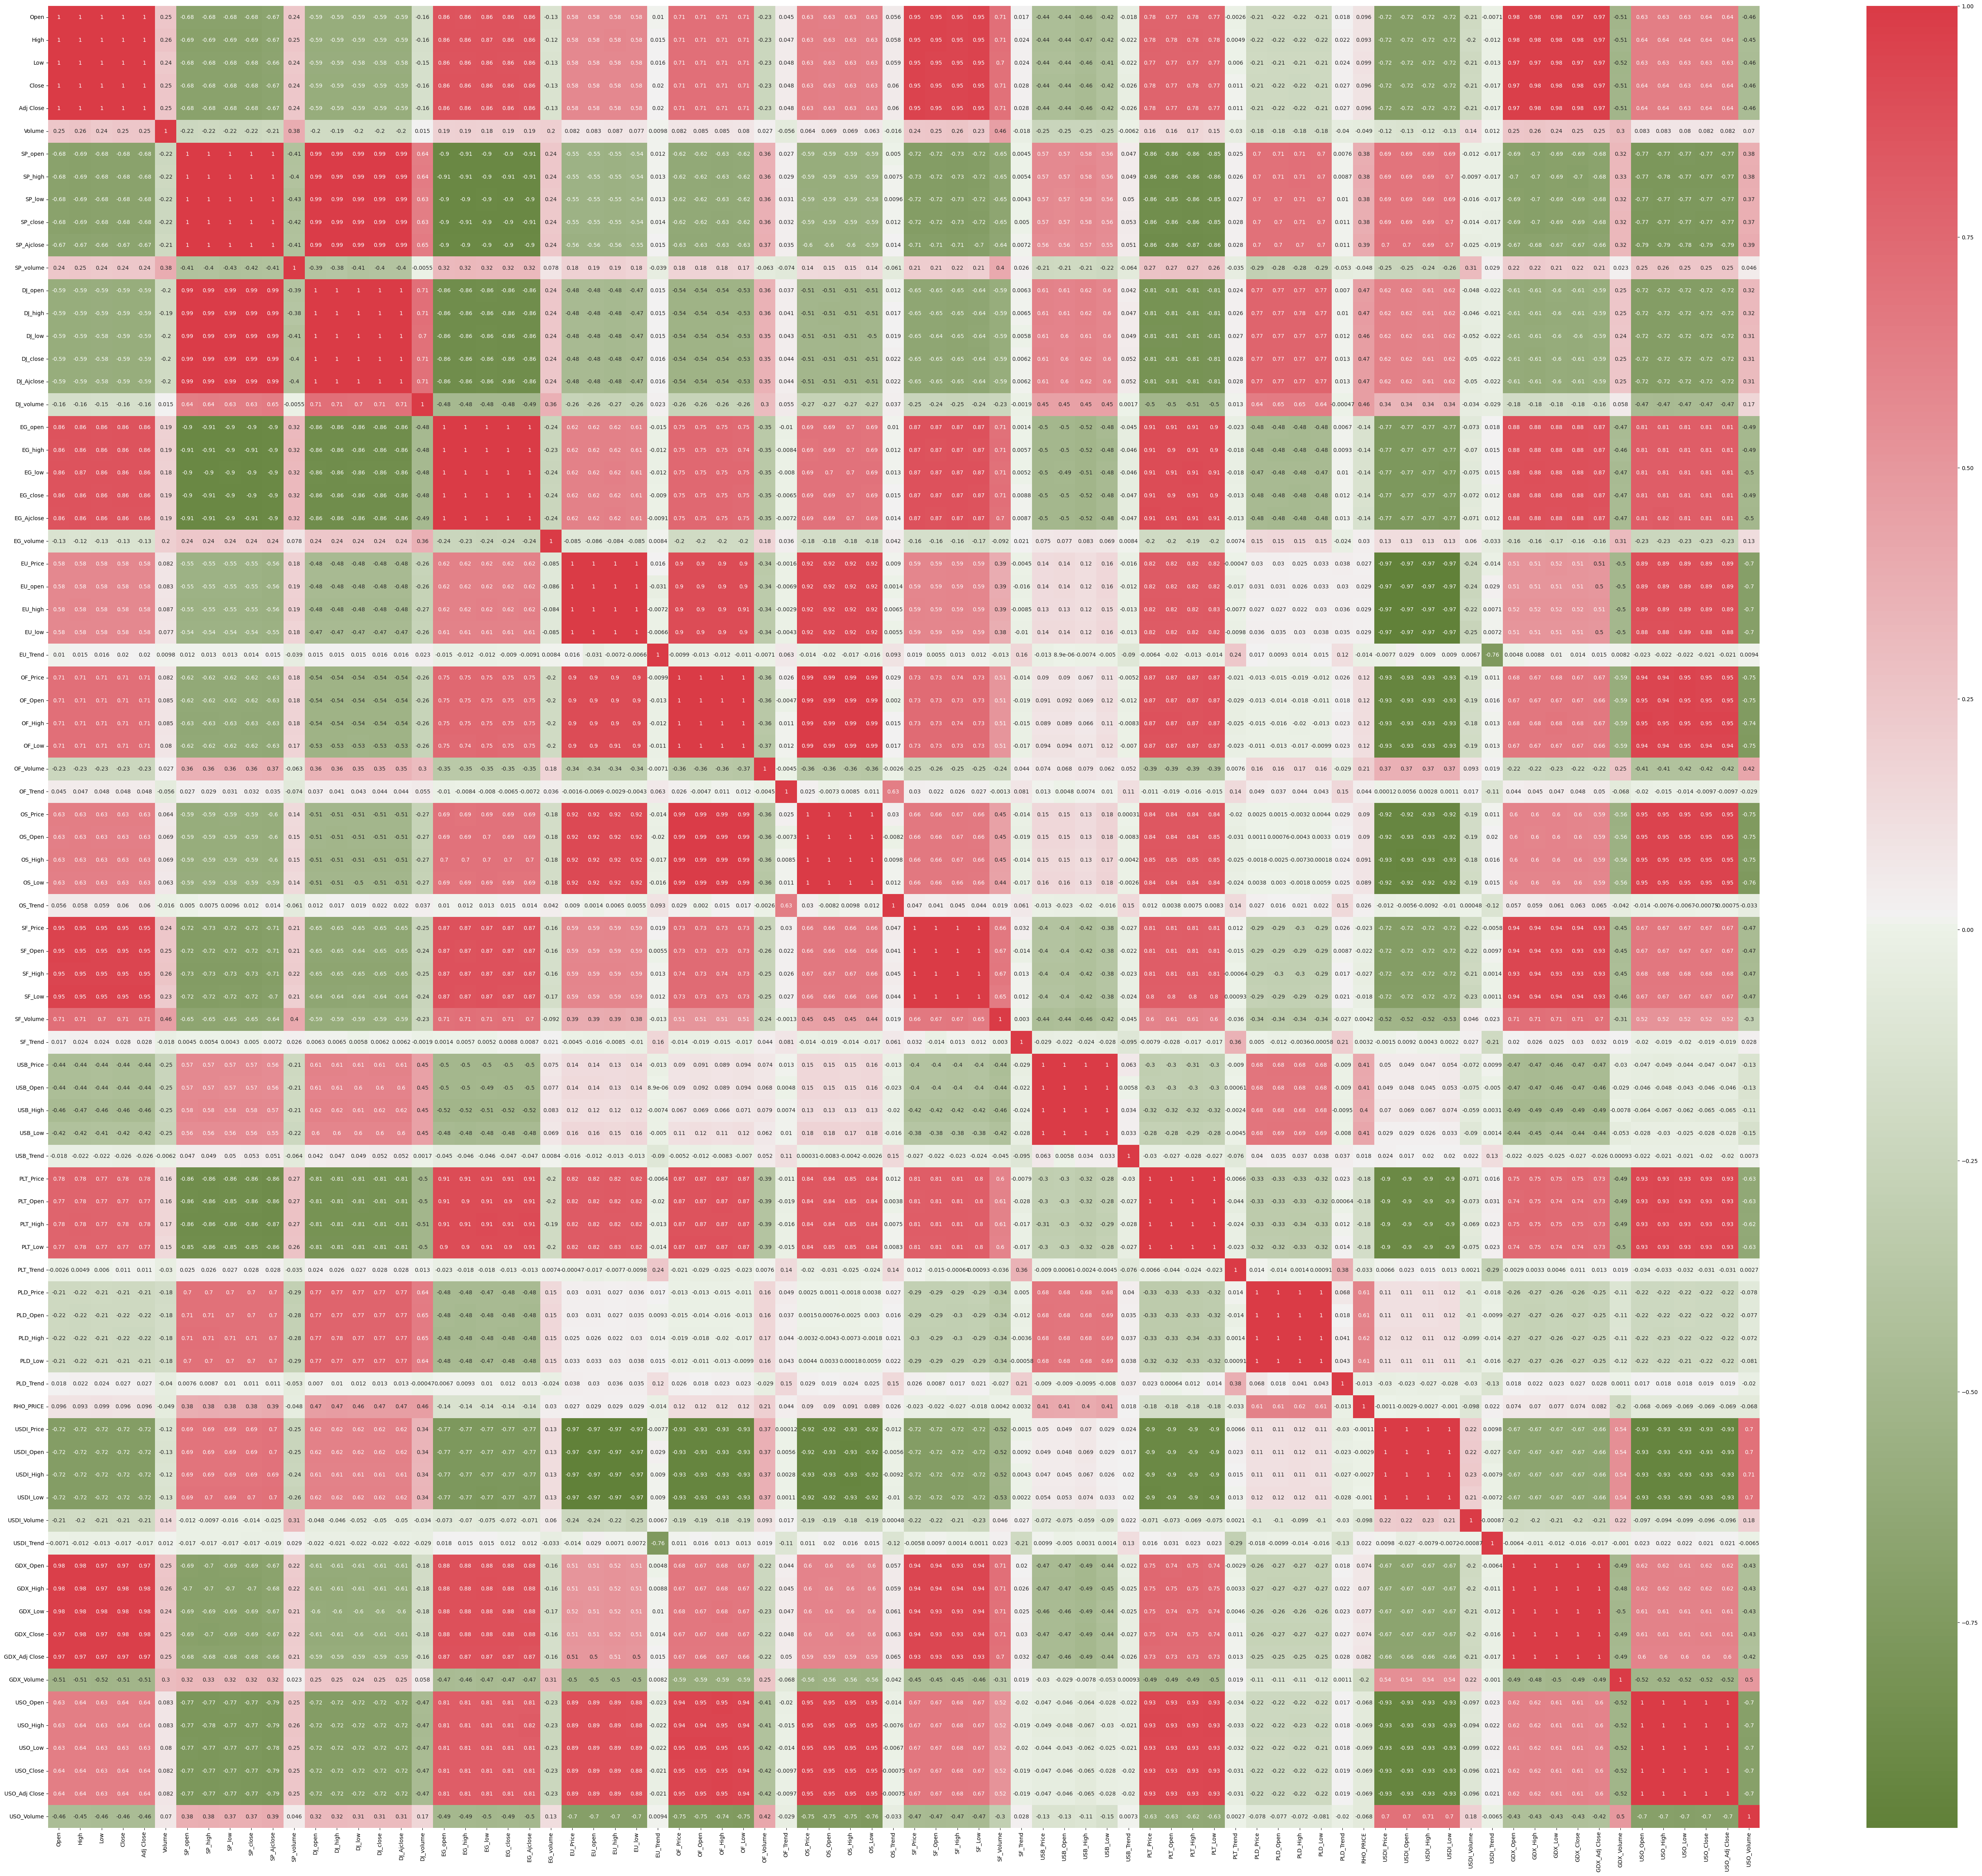

In [ ]:
plt.subplots(figsize=(70,60))
sns.heatmap(corr_score, xticklabels=corr_score.columns, yticklabels=corr_score.columns,
            annot=True, cmap=sns.diverging_palette(110, 10, as_cmap=True))


**feature selection**

In [7]:
feature = data[data.columns]

set prediction

In [8]:
predict = "High"

Set predictor

In [9]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

<ipython-input-9-333148d26339>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


train test split

In [10]:
for _ in range(50):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)
  linear = linear_model.LinearRegression()
  linear.fit(x_train, y_train)
  test_acc = linear.score(x_test, y_test)
  train_acc = linear.score(x_train, y_train)

In [11]:
print(f"test accurecy: {test_acc}")
print(f"train accurecy: {train_acc}")

test accurecy: 0.999820213336118
train accurecy: 0.9998303973581756


**Conclusion**
b.c both score(train and test near together we no have overfitting)

# **Overfit and Underfitting check**

# **applying for cross validation**

##set validation set

In [12]:
from sklearn.model_selection import cross_val_predict

val_predicted = cross_val_predict(linear, x_train, y_train, cv=5)
print(f"prediction on validation set: {val_predicted}")

prediction on validation set: [129.22310585 112.81527346 156.18215834 ... 121.85492297 125.12545812
 112.88195444]


##plotting validation set

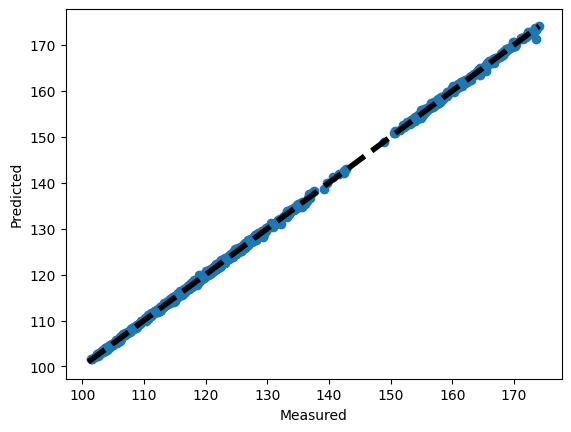

In [15]:
fig, ax = plt.subplots()
ax.scatter(y_train, val_predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##validation accurecy score

In [16]:
from sklearn.model_selection import cross_val_score
cross_valid_scor = cross_val_score(estimator=linear, X=x_train, y=y_train, cv=5)
print("accuracy: {:.2f}%".format(cross_valid_scor.mean()*100))

accuracy: 99.98%


#conclusion

In [19]:
best_score = 0
if test_acc > best_score:
  with open("analaysismodel.pickle", 'wb') as f:
    pickle.dump(linear, f)

newModel = pickle.load(open('analaysismodel.pickle', 'rb'))

print(f"coefficents array:{newModel.coef_}")
print("-----------+++++++++++++++++--------------")
print(f"intercept value:{newModel.intercept_}")
print("-----------+++++++++++++++++--------------")

result = newModel.predict(x_test)
for i in range(5):
  print(f"result:{result[i]}", f"y_test:{y_test[i]}")

coefficents array:[ 5.93597656e-01 -2.08047167e-01  3.06677322e-01  3.06672221e-01
  2.62012333e-08  2.94881405e-02 -2.81027088e-02 -4.27717521e-02
  7.58879914e-02 -3.33564265e-02 -5.99167238e-10 -3.11672939e-05
  2.23196747e-04  6.11340317e-05 -1.23826599e-04 -1.23818986e-04
  1.10615829e-10 -9.35910046e-03 -1.27680033e-02  2.29962059e-02
  1.44280058e-01 -1.51234381e-01  5.64595112e-09 -3.23174110e+00
  1.09080898e+01 -5.61986321e+00 -7.50417399e-03  2.51635257e-02
  1.78738118e-02  2.47607753e-02 -7.39472455e-04 -3.75819727e-02
 -3.95297746e-08  1.03498456e-02  2.99673972e-02 -1.27812812e-02
 -2.89099661e-02  7.62236331e-03 -6.79047062e-04  9.72507937e-05
  3.32162883e-05 -2.08635846e-05 -1.09215738e-04  6.09995123e-08
 -1.78743494e-03  2.38758526e-01  1.11440116e+00 -3.99059325e-01
 -9.48358594e-01  4.02683758e-02 -4.05688409e-03 -3.77414697e-03
  6.76707990e-03  8.37935627e-04  5.74244534e-03  2.39961992e-03
 -8.80533126e-04 -1.23806015e-03 -2.92901034e-04 -2.76209851e-02
 -1.254